# Diabetes Health Prediction

**Data Source:** [kaggle](https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset)

**Members**:
- David Mairena
- Fernando Sirias

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.simplefilter("ignore")

In [127]:
df = pd.read_csv("data\diabetes_balance.csv")
df.shape

(70692, 22)

In [128]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [129]:
df.Diabetes_binary.value_counts(normalize=True)

0.0    0.5
1.0    0.5
Name: Diabetes_binary, dtype: float64

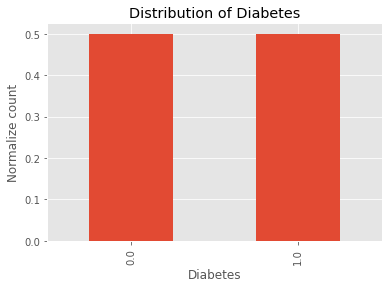

In [130]:
df.Diabetes_binary.value_counts(normalize=True).plot(kind='bar')
plt.title("Distribution of Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Normalize count")
plt.show()

In [131]:
df.Sex.value_counts(normalize=True)

0.0    0.543003
1.0    0.456997
Name: Sex, dtype: float64

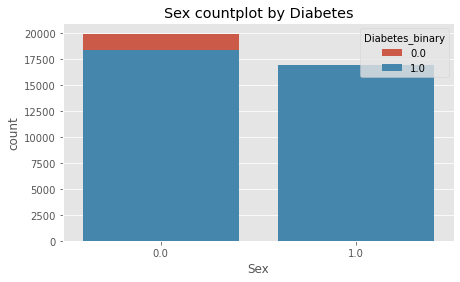

In [132]:
plt.figure(figsize=(7, 4))
sns.countplot(data = df, x = 'Sex', hue='Diabetes_binary', dodge=False)
plt.title("Sex countplot by Diabetes")
plt.show()

## Data Cleaning

In [133]:
print("Total N/A:", df.isnull().sum().sum())

Total N/A: 0


In [134]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

## Exploratory Data Analysis

In [135]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [136]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


---
`Age` columns as a range of values between 1 and 13, this is because each value correspond to a range of 5 years:
- **1:** 18-24.
- **2:** 25-29.
- **3:** 30-34.
- ...
- **13:** 80 or older.

So in the next plot we can see the ranges of ages with most cases of diabetes, people with an age between **65-69** (10) are more likely to have diabetes.

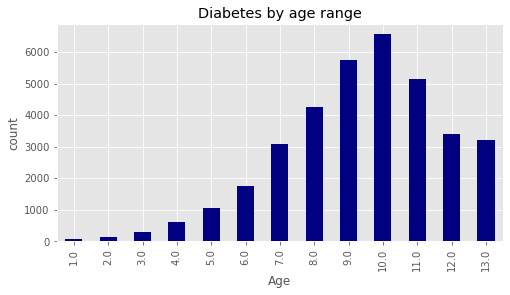

In [137]:
plt.figure(figsize=(8,4))
temp = df[df.Diabetes_binary == 1].groupby('Age').Diabetes_binary.count()
temp.plot(kind="bar", color='navy')
plt.title("Diabetes by age range")
plt.ylabel("count")
plt.show()

---
In the next plot we can see that if you have high cholesterol levels you are basically **twice** as likely to have diabetes as people without high cholesterol.

The second plot you us that the people that checks their cholesterol level in the past 5 years have the most **negatives** diabetes cases, this can be due the people that didn't check their cholesterol dont receive an alert to avoid diabetes.

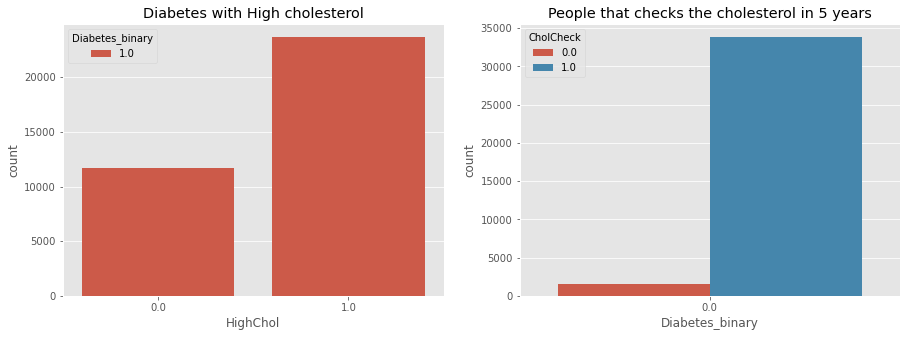

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data = df[df.Diabetes_binary == 1], x = 'HighChol', hue = 'Diabetes_binary', ax=axes[0])
axes[0].set_title("Diabetes with High cholesterol")
sns.countplot(data = df[df.Diabetes_binary == 0], x = 'Diabetes_binary', hue = 'CholCheck', ax=axes[1])
axes[1].set_title("People that checks the cholesterol in 5 years")
plt.show()

---
The following plot shows that people who do physical activities are **less likely to have diabetes.**

Since exercising helps improve cholesterol levels, blood pressure and body weight, also one of the most important factors is that it helps improve resistance to insulin.

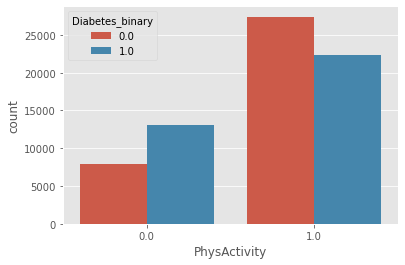

In [139]:
sns.countplot(data = df, x = 'PhysActivity', hue = 'Diabetes_binary')
plt.show()

---
The following graph shows us that the column `BMI` is not a factor related to diabetes, since it can be seen that both categories of the column `diabetes` (0, 1) have relatively the same **distribution**.


<AxesSubplot:xlabel='Diabetes_binary', ylabel='BMI'>

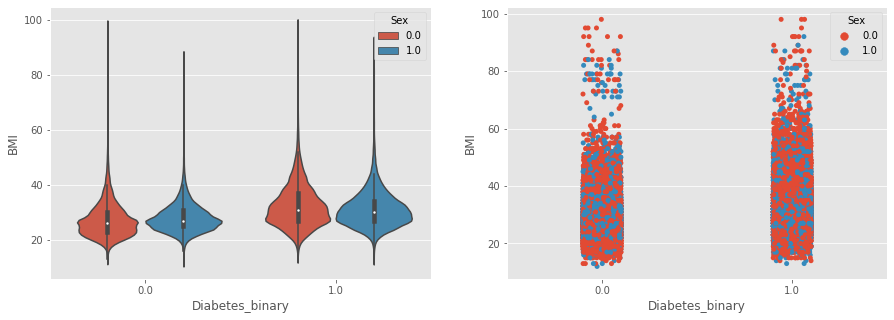

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(data = df, x = 'Diabetes_binary', y = 'BMI',hue='Sex', ax=axes[0])
sns.stripplot(data = df, x = 'Diabetes_binary', y = 'BMI', hue='Sex', ax=axes[1])

---
Next we created a plot that shows the amount of people that consume fruits and vegetables. As we can see, there is more risk of having Diabetes if people doesn't eat vegetables or fruits.   

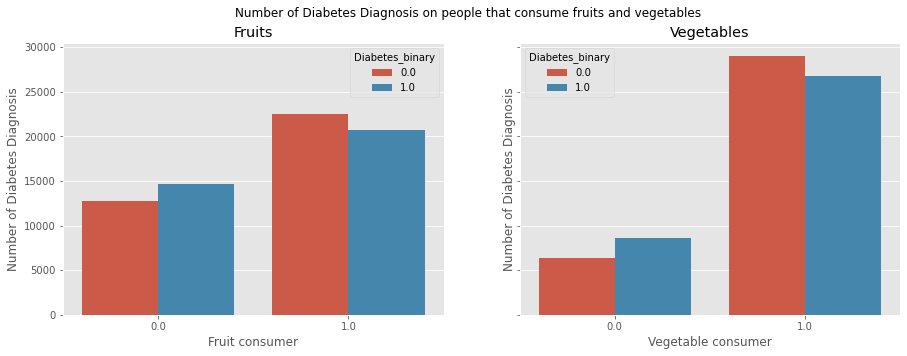

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Number of Diabetes Diagnosis on people that consume fruits and vegetables')

# fruits
sns.countplot(data = df, x = 'Fruits', hue = 'Diabetes_binary', ax=axes[0])
axes[0].set_title("Fruits")
axes[0].set_xlabel("Fruit consumer")
axes[0].set_ylabel("Number of Diabetes Diagnosis")

# veggie
sns.countplot(data = df, x = 'Veggies', hue = 'Diabetes_binary', ax=axes[1])
axes[1].set_title("Vegetables")
axes[1].set_xlabel("Vegetable consumer")
axes[1].set_ylabel("Number of Diabetes Diagnosis")

plt.show()

---
Also we have some insights on the Diabetes diagnosis for the people that consumes Alcohol or are Smokers.
As we could see in following plot, it seems to not be correlated with Diabetes because of the minimun differences in the positive and negative diagnosis in both subplots. 

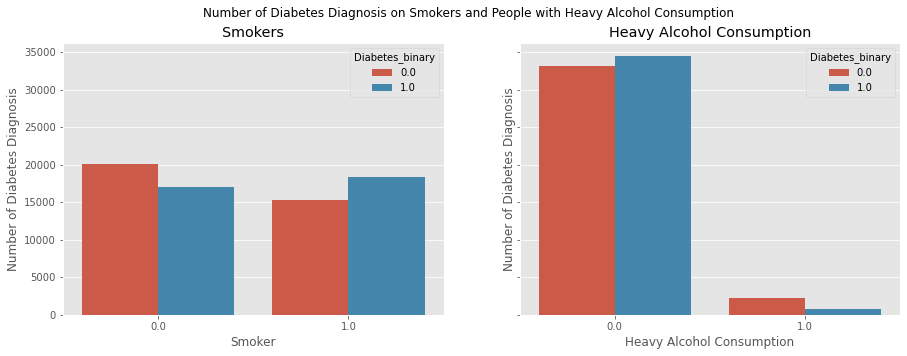

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Number of Diabetes Diagnosis on Smokers and People with Heavy Alcohol Consumption')

# fruits
sns.countplot(data = df, x = 'Smoker', hue = 'Diabetes_binary', ax=axes[0])
axes[0].set_title("Smokers")
axes[0].set_ylabel("Number of Diabetes Diagnosis")

# veggie
sns.countplot(data = df, x = 'HvyAlcoholConsump', hue = 'Diabetes_binary', ax=axes[1])
axes[1].set_title("Heavy Alcohol Consumption")
axes[1].set_xlabel("Heavy Alcohol Consumption")
axes[1].set_ylabel("Number of Diabetes Diagnosis")
plt.show()

---
At the beginning we thought that the `Education` and` Income` columns would not be related to whether the person has diabetes or not, but the following plots do show us a **difference between each of the classes**, as the ratios are quite different between them. So we are going to keep these features in the creation of the model.

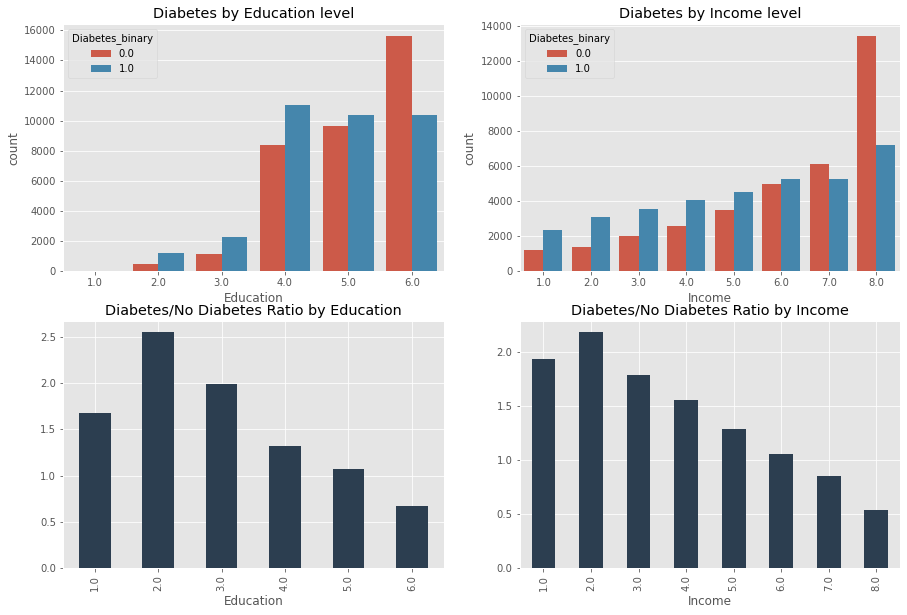

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(data = df, x = 'Education', hue='Diabetes_binary', ax=axes[0, 0])
sns.countplot(data = df, x = 'Income', hue = 'Diabetes_binary', ax=axes[0, 1])
axes[0, 0].set_title("Diabetes by Education level")
axes[0, 1].set_title("Diabetes by Income level")
temp0 = df[df.Diabetes_binary == 0].groupby('Education').Education.count()
temp1 = df[df.Diabetes_binary == 1].groupby('Education').Education.count()
temp2 = df[df.Diabetes_binary == 0].groupby('Income').Income.count()
temp3 = df[df.Diabetes_binary == 1].groupby('Income').Income.count()
(temp1/temp0).plot(kind='bar', ax= axes[1, 0], color='#2C3E50')
(temp3/temp2).plot(kind='bar', ax= axes[1, 1], color ='#2C3E50')
axes[1,0].set_title("Diabetes/No Diabetes Ratio by Education")
axes[1,1].set_title("Diabetes/No Diabetes Ratio by Income")
plt.show()

## Feature Engineering & Model Creation

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score

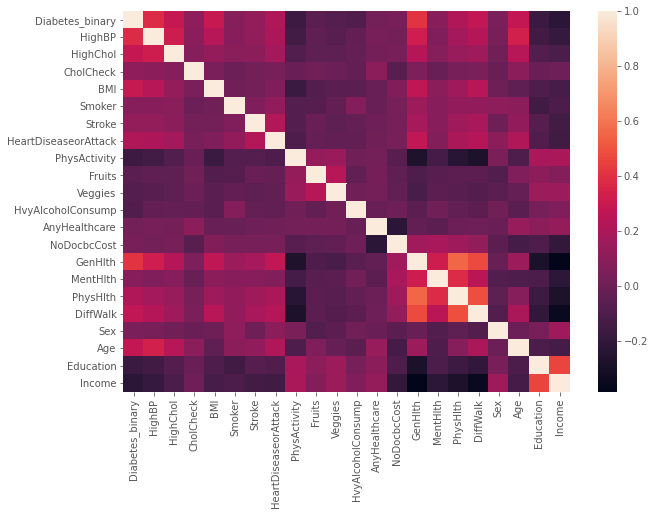

In [145]:
df_corr = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(df_corr)
plt.show()

In [170]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape with Outliers:", df.shape)
print("Shape without Outliers:", df_out.shape)

Shape with Outliers: (70692, 22)
Shape without Outliers: (30487, 22)


In [171]:
features = df_out.drop('Diabetes_binary', axis=1)
target = df_out.Diabetes_binary

In [147]:
print("----- Uniques values in each column -----")
for i in df.columns:
    print(f"{i} uniques: {len(df[i].unique())}")

----- Uniques values in each column -----
Diabetes_binary uniques: 2
HighBP uniques: 2
HighChol uniques: 2
CholCheck uniques: 2
BMI uniques: 80
Smoker uniques: 2
Stroke uniques: 2
HeartDiseaseorAttack uniques: 2
PhysActivity uniques: 2
Fruits uniques: 2
Veggies uniques: 2
HvyAlcoholConsump uniques: 2
AnyHealthcare uniques: 2
NoDocbcCost uniques: 2
GenHlth uniques: 5
MentHlth uniques: 31
PhysHlth uniques: 31
DiffWalk uniques: 2
Sex uniques: 2
Age uniques: 13
Education uniques: 6
Income uniques: 8


In [172]:
scaler = StandardScaler()
t = np.asarray(features.BMI)
t = t.reshape(-1, 1)
features.BMI = scaler.fit_transform(t)
features.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
2,0.0,0.0,1.0,-0.465246,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,-0.097243,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,0.086759,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
7,0.0,0.0,1.0,0.454762,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,1.0,0.638764,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0


In [173]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (21340, 21)
X_test: (9147, 21)
y_train: (21340,)
y_test: (9147,)


---
>### K-Nearest Neighbor

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
knn_scores = []
for i in range(7,12):
    print(f"Running: {i} neighbors")
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_test)
    knn_scores.append(accuracy_score(y_test, y_preds))

Running: 7 neighbors
Running: 8 neighbors
Running: 9 neighbors
Running: 10 neighbors
Running: 11 neighbors


Text(0, 0.5, 'Testing Accuracy')

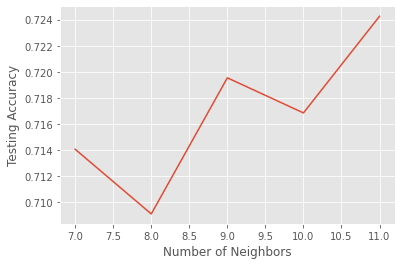

In [152]:
plt.plot(range(7,12), knn_scores)
plt.xlabel("Number of Neighbors")
plt.ylabel("Testing Accuracy")

In [153]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

In [160]:
print("----- K-Nearest Neighbor Metrics -----")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("AUC:", roc_auc_score(y_test, knn_preds))

----- K-Nearest Neighbor Metrics -----
Accuracy: 0.7168521312712184
AUC: 0.7168552434795855


---
>### XGBClassifier

In [155]:
from xgboost import XGBClassifier

In [194]:
xgbc = XGBClassifier(n_estimators=500, learning_rate=0.01, early_stopping_rounds= 15)
xgbc.fit(X_train, y_train)
xgbc_preds = xgbc.predict(X_test)

[15:53:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:53:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [195]:
print("----- XGBClassifier Metrics -----")
print("Accuracy:", accuracy_score(y_test, xgbc_preds))
print("AUC:", roc_auc_score(y_test, xgbc_preds))

----- XGBClassifier Metrics -----
Accuracy: 0.7421012353777194
AUC: 0.7330696258474486


In [ ]:
params = {'max_depth': [3, 6, 9, 10, 15],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.5, 1]}

grid = GridSearchCV(xgbc, param_grid=params)
grid.fit(X_train, y_train)

In [167]:
pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.929359,0.063516,0.012368,0.001017,3,10,1,"{'max_depth': 3, 'min_child_weight': 10, 'subs...",0.750227,0.753158,0.752753,0.754168,0.751112,0.752284,0.001424,1
3,0.940450,0.062151,0.011968,0.000631,3,5,1,"{'max_depth': 3, 'min_child_weight': 5, 'subsa...",0.749419,0.752450,0.751541,0.753259,0.751112,0.751556,0.001301,2
1,0.677709,0.055106,0.008178,0.000399,3,1,1,"{'max_depth': 3, 'min_child_weight': 1, 'subsa...",0.750025,0.751541,0.752046,0.751642,0.749293,0.750909,0.001060,3
2,1.245301,0.197743,0.010771,0.002476,3,5,0.5,"{'max_depth': 3, 'min_child_weight': 5, 'subsa...",0.749015,0.749520,0.750632,0.750733,0.752324,0.750445,0.001145,4
4,1.589409,0.183917,0.014162,0.001163,3,10,0.5,"{'max_depth': 3, 'min_child_weight': 10, 'subs...",0.750733,0.749823,0.748004,0.750227,0.750606,0.749879,0.000990,5


---
>### Neuronal Network Model

In [158]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [162]:
y_preds = clf.predict(X_test)
print("Accuracy",  accuracy_score(y_test,y_preds))
print("Accuracy_auc",  roc_auc_score(y_test,y_preds))

Accuracy 0.7480667672576387
Accuracy_auc 0.7480559017723246


---
>### Random Forest 

In [197]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
print("Accuracy",  accuracy_score(y_test,y_preds))
print("Accuracy_auc",  roc_auc_score(y_test,y_preds))

Accuracy 0.7248278123975074
Accuracy_auc 0.7136820432279198
